# Install Dependencies

## External Dependencies

In [1]:
!pip install python-telegram-bot matplotlib prettytable pandas beautifulsoup4 yfinance expiringdict easy_equities_client


[notice] A new release of pip available: 22.2.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


## FrostAura Dependencies

In [2]:
import os
import sys

USE_LOCAL_CODE: bool = True # NOTE: When changing this configuration, be sure to restart the interpreter in order to have sys path updates reflect.
directories_to_move_up: int = 2
current_executing_path: str = os.getcwd()
current_executing_path = current_executing_path.replace('\\', '/')
root_path: str = '/'.join(current_executing_path.split('/')[:-directories_to_move_up])

# Clean up.
%pip uninstall frostaura -y
sys.path = [p for p in sys.path if p != root_path]

if USE_LOCAL_CODE:
    sys.path.append(root_path)
else:
    %pip install -U --no-cache-dir frostaura

Note: you may need to restart the kernel to use updated packages.


# Import Dependencies

In [3]:
from frostaura.data_access import INotificationsDataAccess
from frostaura.data_access import TelegramNotificationsDataAccess
from telegram import Update
import uuid
import matplotlib.pyplot as plt
import pandas as pd

# Usage

## Sending

In [5]:
config: dict = {}
bot_token = os.environ.get('telegram_bot_token')
personal_chat_id = os.environ.get('telegram_chat_id')
instance: INotificationsDataAccess = TelegramNotificationsDataAccess(bot_token=bot_token,
                                                                     chat_id=personal_chat_id)

In [6]:
instance.send_text('Hello ***World!***')

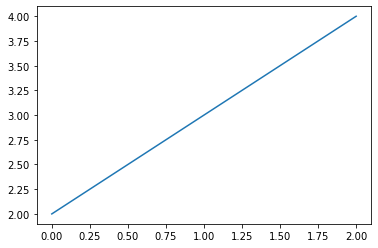

In [7]:
fig = plt.plot([2,3,4])[0].get_figure()

instance.send_figure(figure=fig)

In [8]:
df: pd.DataFrame = pd.DataFrame({
    'Col 1': [
        'Col 1 > Row 1',
        'Col 1 > Row 2'
    ],
    'Col 2': [
        'Col 2 > Row 1',
        'Col 2 > Row 2'
    ]
})

instance.send_dataframe(dataframe=df)

In [9]:
instance.__exit__(exc_type=None, exc_value=None, t_b=None)

Error while getting Updates: Conflict: terminated by other getUpdates request; make sure that only one bot instance is running


## Receiving

In [10]:
config: dict = {}
bot_token = os.environ.get('telegram_bot_token')
personal_chat_id = os.environ.get('telegram_chat_id')
instance: INotificationsDataAccess = TelegramNotificationsDataAccess(bot_token=bot_token,
                                                                     chat_id=personal_chat_id)

In [11]:
def on_message(update: Update, context) -> None:
    message = update.message
    sender = message.from_user
    sender_full_name: str = f'{sender.first_name} {sender.last_name}'
    files_to_process: list = []

    voice = message.voice
    if voice is not None:
        filename: str = str(uuid.uuid4())
        filepath: str = f'../../data/voicenote_{filename}.mp3'
        files_to_process.append(filepath)
        file = context.bot.get_file(voice.file_id)
        file.download(filepath)

        context.bot.send_message(
            chat_id=personal_chat_id,
            reply_to_message_id=message.message_id,
            text=f'[VOICE] => {sender_full_name}: {filepath}'
        )
        print(f'[VOICE] => {sender_full_name}: {filepath}')

    photos = message.photo
    if photos is not None and len(photos) > 0:
        filename: str = str(uuid.uuid4())

        for photo in photos:
            filepath: str = f'../../data/photo_{filename}_{photo.width}x{photo.height}.png'
            files_to_process.append(filepath)
            file = context.bot.get_file(photo.file_id)
            file.download(filepath)

        context.bot.send_message(
            chat_id=personal_chat_id,
            reply_to_message_id=message.message_id,
            text=f'[PHOTO] => {sender_full_name}: {len(photos)}'
        )
        print(f'[PHOTO] => {sender_full_name}: {len(photos)}')

    text: str = message.text
    if text is not None:
        context.bot.send_message(
            chat_id=personal_chat_id,
            reply_to_message_id=message.message_id,
            text=f'[Text] => {sender_full_name}: {text}'
        )
        print(f'[Text] => {sender_full_name}: {text}')

    # TODO: After processing everything to text, construct a modalities prompt.

instance.message_handler = on_message

In [13]:
instance.__exit__(exc_type=None, exc_value=None, t_b=None)

Error while getting Updates: Conflict: terminated by other getUpdates request; make sure that only one bot instance is running
